<a href="https://colab.research.google.com/github/KyunghoonJeon/DeepLearningFromScratch/blob/main/MNISt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
cd /content/drive/MyDrive/deep-learning-from-scratch

/content/drive/MyDrive/deep-learning-from-scratch


In [3]:
path = '/content/drive/MyDrive/deep-learning-from-scratch'

In [4]:
from dataset.mnist import load_mnist
from common.functions import sigmoid, softmax

In [5]:
(x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=False)

In [6]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [7]:
from PIL import Image
import pickle

In [8]:
import numpy as np

def img_show(img):
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

img = x_train[0]
label = t_train[0]
print(label)

5


In [9]:
print(img.shape)
img = img.reshape(28,28)
print(img.shape)

(784,)
(28, 28)


In [10]:
img=Image.fromarray(np.uint8(img))

In [11]:
display(img)

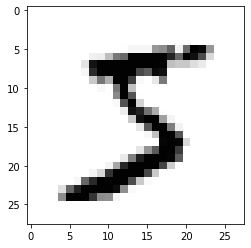

In [12]:
import matplotlib.pyplot as plt
# 위 60000개 데이터 배열에서 0번째 원소를 흑백으로 출력
plt.imshow(img, cmap='Greys')
plt.show()

In [13]:
def get_data():
    (x_train, t_train), (x_test, t_test) = load_mnist(flatten=True, normalize=True, one_hot_label=False)
    return x_test, t_test

In [14]:
def init_network():
    with open(path + '/ch03/'+"sample_weight.pkl", 'rb') as f:
        network = pickle.load(f)
    
    return network

In [15]:
def predict(network, x):
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']

    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)

    return y

In [16]:
x, t = get_data()
network = init_network()

In [17]:
accuracy_cnt=0
for i in range(len(x)):
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i]:
        accuracy_cnt+=1

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [18]:
x, _ = get_data()

In [19]:
network = init_network()

In [20]:
W1, W2, W3 = network['W1'], network['W2'], network['W3']

In [21]:
x.shape

(10000, 784)

In [22]:
x[0].shape

(784,)

In [23]:
W1.shape

(784, 50)

In [24]:
W2.shape

(50, 100)

In [25]:
W3.shape

(100, 10)

In [29]:
x, t = get_data()
network = init_network()

batch_size=100
accuracy_cnt=0

for i in range(0, len(x), batch_size):
    x_batch = x[i:i+batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis=1)
    accuracy_cnt += np.sum(p == t[i:i+batch_size])

print("Accuracy:" + str(float(accuracy_cnt) / len(x)))

Accuracy:0.9352


In [30]:
x = np.array([[0.1, 0.8, 0.1], [0.3, 0.1, 0.6],
              [0.2, 0.5, 0.3], [0.8, 0.1, 0.1]])

In [38]:
y = np.argmax(x, axis=1)

In [39]:
print(y)

[1 2 1 0]
